# Captsone 2 Data Cleaning and EDA Notebook

This notebook will be used to perform some prelimary exploration of the data for my second Springboar capstone project. The primary goal of the project is to analyze what factors of a vehicle might affect the MSRP of a vehicke. The data was scraped by Kaggle user CooperUnion amd can be obtained from: https://www.kaggle.com/CooperUnion/cardataset.

The primary goal of this part of the project will be to perform a prelimanry analysis of counts and summary statistics of data, checking what data may be missing, and deciding what I would like to do with the data that is missing.

I will also look into creating dummy variables for various categorical features the data have in order to ease some analysis later in the project.

In [1]:
# Importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Importing the data and displaying the head to confirm it is what it is supposed to be
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


The data does appear to have been imported correctly, but the column names are not great for coding, so the first thing I am going to do is change the names of the columns so they still convey the same information but I can still code efficiently with them.

In [4]:
# set up and import new column names
new_col_names = ['make','model', 'year', 'fuel_type', 'hp', 'num_cyl', 'trans_type', 'drive_type', 'doors', 'category', 'size', 'style', 'highway_mpg', 'city_mpg', 'popularity', 'MSRP']
df.columns = new_col_names

In [5]:
df.head()

,make,model,year,fuel_type,hp,num_cyl,trans_type,drive_type,doors,category,size,style,highway_mpg,city_mpg,popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Now that the column names are in a more digestible format, I am going to start trying to get an idea for how much information I actually have regarding each variable, and what the composition of each variableis like. 

In [6]:
df.shape

(11914, 16)

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
make           11914 non-null object
model          11914 non-null object
year           11914 non-null int64
fuel_type      11911 non-null object
hp             11845 non-null float64
num_cyl        11884 non-null float64
trans_type     11914 non-null object
drive_type     11914 non-null object
doors          11908 non-null float64
category       8172 non-null object
size           11914 non-null object
style          11914 non-null object
highway_mpg    11914 non-null int64
city_mpg       11914 non-null int64
popularity     11914 non-null int64
MSRP           11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


Initially it seems like most of the data is present, and most columns are only missing a few values. The category variable is missing a large number of values, so that will need to be considered moving forward with the project. I;m not sure that horsepower and number of cylinders need to be floats so it may be valuable to turn them into integers, but since this dataset isn't extremely large it may be fine to leave it as is.

# Initial EDA

I will now take some time to observe counts and summary statistics of a few of the colums to get an idea of what is going on in the big picture sense of this data. 

In [8]:
makes = df.groupby('make').size().sort_values(ascending=False)
makes

make
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Bugat

In [9]:
len(makes)

48

It seems that we have 48 unique manufacturers, none that are a missing value or a typo, which is quite fortunate for us. The number of vehicles for each brand is somewhat interesting, Chevrolet is the larget amount easily and there are a few manufacturers with less than 100 vehicles in the data set. This information could be valuable to the analysis later.

In [10]:
models = df.groupby('model').size().sort_values(ascending=False)
models

model
Silverado 1500                      156
Tundra                              140
F-150                               126
Sierra 1500                          90
Beetle Convertible                   89
Tacoma                               80
GTI                                  76
Frontier                             76
Accord                               75
Beetle                               75
Civic                                68
Dakota                               65
Ram Pickup 1500                      62
Jetta                                61
Corvette                             60
911                                  58
C/K 1500 Series                      56
Colorado                             54
XC60                                 54
3                                    53
370Z                                 51
Sienna                               51
Golf GTI                             50
E-Class                              49
Silverado 1500 Classic            

Looking at models now, it appears that there are 915 unique models of vehicles in the dataset, and the top three are all popular trucks. I suspenct that these trucks are the most common vehicles in the dataset because of how many different variations they are relesed in. I will now check the years of vehicles to see what range of time can be observed as well as how many vehicles from each year the dataset contains.

In [11]:
years = df.groupby('year').size().sort_values(ascending=False)
years

year
2015    2170
2016    2157
2017    1668
2014     589
2012     387
2009     379
2013     366
2008     349
2007     345
2010     298
2011     285
2003     238
2004     235
2005     213
1993     209
2006     205
2002     205
1992     177
1997     175
2001     168
1994     163
1998     154
1991     152
1995     135
1996     131
1990     123
1999     120
2000     118
dtype: int64

It seems the data ranges from 1990 to 2017, but is dominated by vehicles from 2015, 2016, and 2017. It may be worth considering limiting the years being observed to the most recent ones considering this project is focused on understanding MSRP which may just change as a focus of time, and there is a large number of vehicles to look at in the 2015-17 range.

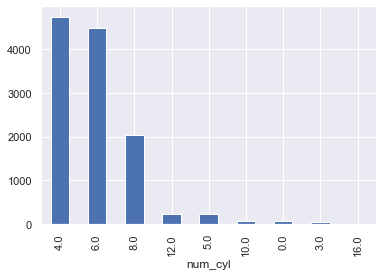

In [12]:
cyls = df.groupby('num_cyl').size().sort_values(ascending=False)
cyls.plot(kind='bar')

In [13]:
cyls

num_cyl
4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
10.0      68
0.0       56
3.0       30
16.0       3
dtype: int64

As expected the number of cylinders is dominated by 4, 6, and 8 cylinder vehicles, with the more niche numbers of cylinders lagging far behind those. Part of the point of all these groupings is to try to find typos in the data but so far most of the data seems fairly clean or reasonable. I am now going to look a few more counts of the more categorical variables, and then I am going to observe summary statistics of the more constinous variables, I don't assume I will be writting much until the summary statistics. 

In [14]:
fuels = df.groupby('fuel_type').size().sort_values(ascending=False)
fuels

fuel_type
regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
dtype: int64

In [15]:
sizes = df.groupby('size').size().sort_values(ascending=False)
sizes

size
Compact    4764
Midsize    4373
Large      2777
dtype: int64

In [16]:
styles = df.groupby('style').size().sort_values(ascending=False)
styles

style
Sedan                  3048
4dr SUV                2488
Coupe                  1211
Convertible             793
4dr Hatchback           702
Crew Cab Pickup         681
Extended Cab Pickup     623
Wagon                   592
2dr Hatchback           506
Passenger Minivan       417
Regular Cab Pickup      392
2dr SUV                 138
Passenger Van           128
Cargo Van                95
Cargo Minivan            71
Convertible SUV          29
dtype: int64

In [17]:
drives = df.groupby('drive_type').size().sort_values(ascending=False)
drives

drive_type
front wheel drive    4787
rear wheel drive     3371
all wheel drive      2353
four wheel drive     1403
dtype: int64

In [18]:
trans = df.groupby('trans_type').size().sort_values(ascending=False)
trans

trans_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
dtype: int64

In [19]:
df.describe()

,year,hp,num_cyl,doors,highway_mpg,city_mpg,popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Observing the past few printouts, we see that size only has three categories and drive types has four. THere appear to be no typos there and all of those numbers seem reasonable. The styles column is interesting, as it appears to be split among several categories, but most of them are fairly small relative to the dataset. The drive types data also seems reasonable and the numeric data doesn't seem to have any obvious errors or strange occurences at first glance. 

# Continuing EDA: Histograms

I'm now going to create histograms of the numeric variables primarily to check their distributions.

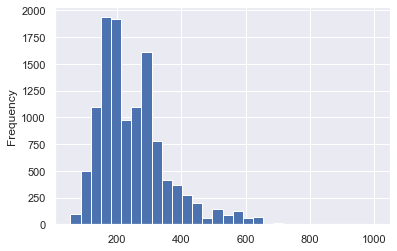

In [20]:
df.hp.plot(kind='hist', bins=30)

It seems horsepower for this dataset is a right-skewed distribution, which makes sense as powerful vehilcles are a popular commodity while most vehicles have some standard amount of power so they won't feel too sluggish. It also appears that the distribution is bimodal, but I'm not sure how much that will matter.

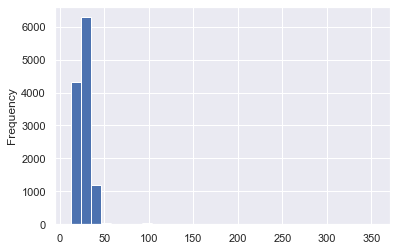

In [21]:
df.highway_mpg.plot(kind='hist', bins=30)

In [22]:
df.loc[df.highway_mpg == 354]

,make,model,year,fuel_type,hp,num_cyl,trans_type,drive_type,doors,category,size,style,highway_mpg,city_mpg,popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


I had assumed the 354 highway MPG was some specialized hybrid vehicle I was unaware of, but it appears I was just wrong and that is an erroneous datapoint. Thankfully I was able to easily look up the highway MPG of the 2017 Audi A6, and I can change that value to its proper 34.

In [23]:
df.at[1119, 'highway_mpg'] = 34

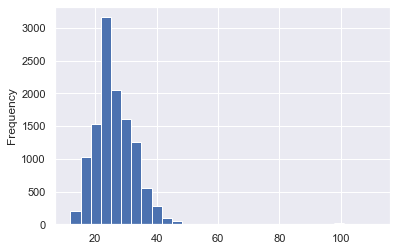

In [24]:
df.highway_mpg.plot(kind='hist', bins=30)

In [25]:
df.describe()

,year,hp,num_cyl,doors,highway_mpg,city_mpg,popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.610626,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.340316,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,111.000000,137.000000,5657.000000,2.065902e+06


In [26]:
df.loc[df.highway_mpg == 111]

,make,model,year,fuel_type,hp,num_cyl,trans_type,drive_type,doors,category,size,style,highway_mpg,city_mpg,popularity,MSRP
5790,BMW,i3,2015,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
5791,BMW,i3,2016,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
5792,BMW,i3,2017,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400


Now that the incorrect outlier has been addressed, highway mpg appears to be rougly normally distributed, with a few extreme outliers being provided by electric vehicles.

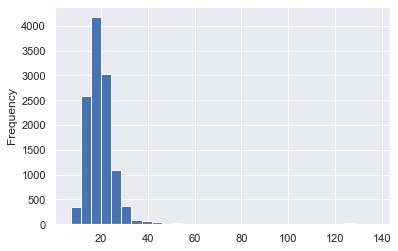

In [27]:
df.city_mpg.plot(kind='hist', bins=30)

City mpg also seems to be normally distributed with large outliers. I am going to check on some specifics for the mpg values to get an idea of how many high values there actually are.

In [28]:
df.loc[df.highway_mpg > 45]

,make,model,year,fuel_type,hp,num_cyl,trans_type,drive_type,doors,category,size,style,highway_mpg,city_mpg,popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1208,Honda,Accord Hybrid,2017,regular unleaded,212.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,47,49,2202,29605
1209,Honda,Accord Hybrid,2017,regular unleaded,212.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,47,49,2202,32905
1210,Honda,Accord Hybrid,2017,regular unleaded,212.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,47,49,2202,35955
1211,Honda,Accord Plug-In Hybrid,2014,regular unleaded,196.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,46,47,2202,39780
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,39900


In [29]:
df.loc[df.city_mpg > 45]

,make,model,year,fuel_type,hp,num_cyl,trans_type,drive_type,doors,category,size,style,highway_mpg,city_mpg,popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1202,Honda,Accord Hybrid,2014,regular unleaded,195.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,45,50,2202,31905
1203,Honda,Accord Hybrid,2014,regular unleaded,195.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,45,50,2202,29155
1204,Honda,Accord Hybrid,2014,regular unleaded,195.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,45,50,2202,34905
1205,Honda,Accord Hybrid,2015,regular unleaded,196.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,45,50,2202,35055
1206,Honda,Accord Hybrid,2015,regular unleaded,196.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,45,50,2202,32055
1207,Honda,Accord Hybrid,2015,regular unleaded,196.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,45,50,2202,29305
1208,Honda,Accord Hybrid,2017,regular unleaded,212.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,47,49,2202,29605


It seems that I was wrong to guess the data was normally ditributed, as it seems in each case more than 100 vehicles fall into categories larger than the visible columns from the previous histograms. I am now going to check the histogram of MSRP and then move to checking a few other statistical plots of these numerical variables.

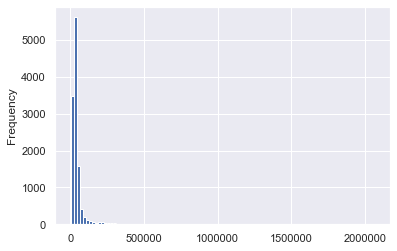

In [30]:
df.MSRP.plot(kind='hist', bins=100)

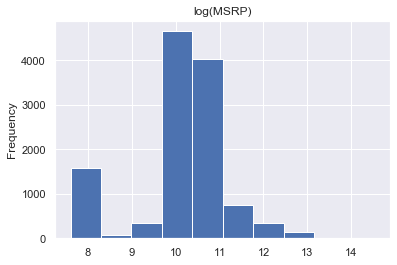

In [31]:
logM = np.log(df.MSRP)
logM.plot(kind='hist', title = 'log(MSRP)')

It does seem that the MSRP is exponentially distributed, but I am not sure on the specifics here as there seems to be two spikes on the log value histogram. I am definitely going to check some other distribution plots for the numerical data in this dataset to try to get a better idea of what is going on in the numerical data.

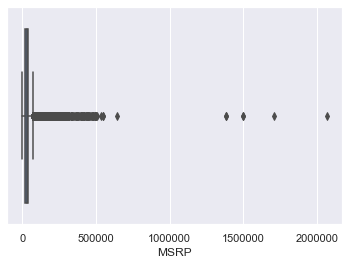

In [32]:
sns.boxplot(df.MSRP)

In [33]:
df.loc[df.MSRP > 5e5]

,make,model,year,fuel_type,hp,num_cyl,trans_type,drive_type,doors,category,size,style,highway_mpg,city_mpg,popularity,MSRP
698,Maybach,62,2010,premium unleaded (required),631.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,High-Performance",Large,Sedan,16,10,67,506500
1622,Lamborghini,Aventador,2014,premium unleaded (required),720.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Midsize,Convertible,16,10,1158,548800
1626,Lamborghini,Aventador,2015,premium unleaded (required),720.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Midsize,Convertible,16,10,1158,548800
1629,Lamborghini,Aventador,2016,premium unleaded (required),750.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Midsize,Convertible,18,11,1158,535500
4024,Ferrari,Enzo,2003,premium unleaded (required),660.0,12.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,12,7,2774,643330
6350,Maybach,Landaulet,2011,premium unleaded (required),620.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,High-Performance",Large,Convertible,16,10,67,1380000
6351,Maybach,Landaulet,2012,premium unleaded (required),620.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,Performance",Large,Convertible,16,10,67,1382750
8486,Lamborghini,Reventon,2008,premium unleaded (required),650.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,1158,1500000
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,2065902
11363,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1500000


It appears that around 11 vehicles are causing the strange distortion in plots regarding the distribution of MSRP in these plots, I would like to observe how MSRP looks without these values, just to see what the graphs look like.

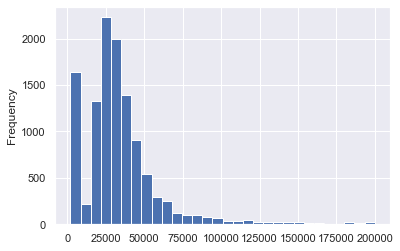

In [34]:
df.loc[df.MSRP < 2e5].MSRP.plot(kind='hist', bins = 30)

It appears there is a large number of 'cheap' vehicles, I would like to see what these are.

In [35]:
df.loc[df.MSRP < 3000]

,make,model,year,fuel_type,hp,num_cyl,trans_type,drive_type,doors,category,size,style,highway_mpg,city_mpg,popularity,MSRP
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
19,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Wagon,20,16,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
21,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Luxury,Midsize,Sedan,21,16,3105,2000
22,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
23,Audi,100,1993,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Wagon,20,16,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
26,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Luxury,Midsize,Sedan,21,16,3105,2000


In [36]:
df.loc[df.MSRP == 2000]

,make,model,year,fuel_type,hp,num_cyl,trans_type,drive_type,doors,category,size,style,highway_mpg,city_mpg,popularity,MSRP
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
19,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Wagon,20,16,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
21,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Luxury,Midsize,Sedan,21,16,3105,2000
22,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
23,Audi,100,1993,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Wagon,20,16,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
26,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Luxury,Midsize,Sedan,21,16,3105,2000


In [37]:
df.loc[(df.MSRP > 2000) & (df.MSRP < 3000)]

,make,model,year,fuel_type,hp,num_cyl,trans_type,drive_type,doors,category,size,style,highway_mpg,city_mpg,popularity,MSRP
95,Nissan,200SX,1998,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,Performance,Compact,Coupe,28,20,2009,2073
165,Mercedes-Benz,300-Class,1991,regular unleaded,177.0,6.0,AUTOMATIC,rear wheel drive,4.0,Luxury,Large,Sedan,19,15,617,2232
168,Mercedes-Benz,300-Class,1991,regular unleaded,177.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Sedan,20,15,617,2105
169,Mercedes-Benz,300-Class,1991,regular unleaded,177.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Wagon,18,15,617,2199
171,Mercedes-Benz,300-Class,1991,regular unleaded,177.0,6.0,AUTOMATIC,rear wheel drive,4.0,Luxury,Large,Sedan,19,15,617,2124
173,Mercedes-Benz,300-Class,1991,regular unleaded,217.0,6.0,AUTOMATIC,rear wheel drive,2.0,Luxury,Midsize,Coupe,22,15,617,2179
176,Mercedes-Benz,300-Class,1992,regular unleaded,228.0,6.0,AUTOMATIC,rear wheel drive,4.0,Luxury,Large,Sedan,17,14,617,2377
178,Mercedes-Benz,300-Class,1992,regular unleaded,177.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Sedan,19,15,617,2207
180,Mercedes-Benz,300-Class,1992,regular unleaded,217.0,6.0,AUTOMATIC,rear wheel drive,2.0,Luxury,Midsize,Coupe,21,15,617,2248
181,Mercedes-Benz,300-Class,1992,regular unleaded,177.0,6.0,AUTOMATIC,rear wheel drive,4.0,Luxury,Midsize,Sedan,22,16,617,2065


After doing quite a bit of research on the prices of the cars showing up here, most of them are deininitely mispriced. The cars with an MSRP of \\$2000 seem to be universally mispriced, so it is possible this was a placeholder for a missing value. The vehicles with an MSRP larger than $2000 and less than \\$3000 also seem to be mispriced, and adding a 0 to their MSRP isn't actually going to fix them, so it seems that these MSRP's are inaccurate as well. I am going to attempt to calculate a proper MSRP for these vehicles, after I perform a bit more cleaning on the data.

# Addressing Categories
There are many missing category values in the data, as well as multiple categories per vehicle. I'm going to try to split the categories into multiple columns and look ate generally how many categories each vehicle has, as well as looking into imputing categories for vehicles which do not have categories.

In [38]:
# Splitting the category data 
cats = []
df['category'] = df.category.astype('str')

for words in df.category:
    cat = words.lower()
    splits = cat.split(',')
    cats.append(splits)

In [39]:
catsdf = pd.DataFrame(cats)
catsdf.columns = ['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5']
catsdf.head()

,cat_1,cat_2,cat_3,cat_4,cat_5
0,factory tuner,luxury,high-performance,None,None
1,luxury,performance,None,None,None
2,luxury,high-performance,None,None,None
3,luxury,performance,None,None,None
4,luxury,None,None,None,None


In [40]:
catsdf.groupby('cat_1').size().sort_values(ascending=False)

cat_1
nan                 3742
crossover           2034
luxury              1937
hatchback           1117
flex fuel           1080
performance          602
exotic               499
factory tuner        446
high-performance     199
diesel               135
hybrid               123
dtype: int64

In [41]:
catsdf.groupby('cat_2').size().sort_values(ascending=False)

cat_2
luxury              1206
performance         1196
high-performance     713
hybrid               169
factory tuner        156
flex fuel            117
hatchback             91
diesel                37
exotic                 2
dtype: int64

In [42]:
catsdf.groupby('cat_3').size().sort_values(ascending=False)

cat_3
high-performance    371
performance         286
luxury              132
hybrid               52
diesel               34
factory tuner        19
dtype: int64

In [43]:
catsdf.groupby('cat_4').size().sort_values(ascending=False)

cat_4
high-performance    91
performance         30
luxury              13
hybrid               3
dtype: int64

In [44]:
catsdf.groupby('cat_5').size().sort_values(ascending=False)

cat_5
high-performance    13
dtype: int64

Looking at these categories, it seems the first two categories would be the most useful for a model, while the up to three additional categories are probably too sparse to be necessarily useful. I am interested in imputing at least the first category for the vehicles that are missing their first category. I will now add the split categories to the data, and attempt to find some way to impute the missing values for the first category. 

In [45]:
newdf = pd.concat([df, catsdf[['cat_1', 'cat_2']]], axis=1)
newdf.drop('category', axis=1, inplace=True)
newdf.head()

,make,model,year,fuel_type,hp,num_cyl,trans_type,drive_type,doors,size,style,highway_mpg,city_mpg,popularity,MSRP,cat_1,cat_2
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,factory tuner,luxury
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,luxury,performance
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,luxury,high-performance
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,luxury,performance
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,luxury,None


In [46]:
newdf.groupby('cat_1').describe()

year                                                 \
                   count         mean       std     min     25%     50%   
cat_1                                                                     
crossover         2034.0  2014.111603  3.293457  2001.0  2013.0  2015.0   
diesel             135.0  2013.659259  6.076825  1990.0  2015.0  2015.0   
exotic             499.0  2011.693387  4.462717  2001.0  2009.0  2013.0   
factory tuner      446.0  2012.159193  6.176377  1991.0  2009.0  2015.0   
flex fuel         1080.0  2013.175926  4.173993  1999.0  2010.0  2015.0   
hatchback         1117.0  2009.888093  8.176755  1990.0  2007.0  2014.0   
high-performance   199.0  2014.080402  3.766354  2001.0  2014.0  2016.0   
hybrid             123.0  2014.422764  2.239760  2008.0  2013.0  2015.0   
luxury            1937.0  2010.395457  8.005650  1990.0  2008.0  2015.0   
nan               3742.0  2006.688669  8.732324  1990.0  1999.0  2008.0   
performance        602.0  2011.458472  6.724364  1990.0  2009.0  2015.0   

                                      hp              ... popularity          \
                     75%     max   count        mean  ...        75%     max   
cat_1                                                 ...                      
crossover         2016.0  2017.0  2027.0  243.188949  ...     2009.0  5657.0   
diesel            2016.0  2017.0   135.0  199.362963  ...     3105.0  5657.0   
exotic            2015.0  2017.0   481.0  505.444906  ...     1158.0  5657.0   
factory tuner     2016.0  2017.0   446.0  406.495516  ...     3105.0  5657.0   
flex fuel         2016.0  2017.0  1074.0  288.568901  ...     2031.0  5657.0   
hatchback         2016.0  2017.0  1098.0  157.609290  ...     1851.0  5657.0   
high-performance  2017.0  2017.0   199.0  379.341709  ...     2009.0  5657.0   
hybrid            2016.0  2017.0   123.0  216.146341  ...     2031.0  5657.0   
luxury            2016.0  2017.0  1929.0  288.136858  ...     1624.0  3916.0   
nan               2015.0  2017.0  3731.0  194.961136  ...     2031.0  5657.0   
performance       2016.0  2017.0   602.0  234.941860  ...     1851.0  5657.0   

                    MSRP                                                    \
                   count           mean            std      min        25%   
cat_1                                                                        
crossover         2034.0   36632.763520   14002.810451  16599.0   27230.00   
diesel             135.0   36748.162963   17149.830656   2000.0   28242.50   
exotic             499.0  232166.048096  187034.394141  43995.0  132660.00   
factory tuner      446.0   62669.852018   45590.236534   2000.0   34695.00   
flex fuel         1080.0   37321.317593   17988.722123   2055.0   28720.00   
hatchback         1117.0   19399.300806   10541.609613   2000.0   15430.00   
high-performance   199.0   45822.185930   17011.048233  25300.0   34695.00   
hybrid             123.0   33566.707317    8228.182274  23640.0   26795.00   
luxury            1937.0   48179.205472   32921.156568   2000.0   34550.00   
nan               3742.0   19961.397114   13360.041354   2000.0    3096.75   
performance        602.0   28455.167774   10929.720224   2000.0   25657.50   

                                                  
                       50%        75%        max  
cat_1                                             
crossover          33785.0   42276.25   159600.0  
diesel             32600.0   42272.50    93450.0  
exotic            205840.0  280400.00  2065902.0  
factory tuner      51500.0   77900.00   247900.0  
flex fuel          34162.5   40648.75   186495.0  
hatchback          20275.0   25120.00    72500.0  
high-performance   39505.0   55200.00   115710.0  
hybrid             30140.0   39367.50    54775.0  
luxury             43995.0   58900.00   200500.0  
nan                21690.0   27850.00    68996.0  
performance        29315.0   33795.00    71665.0  

[11 rows x 64 columns]

In [47]:
nans = newdf[newdf.cat_1 == 'nan']

In [48]:
nans.groupby('make').size()

make
Buick          71
Chevrolet     501
Chrysler       79
Dodge         306
FIAT           21
Ford          382
GMC           245
Honda         165
Hyundai        89
Kia           122
Mazda         164
Mitsubishi     85
Nissan        240
Oldsmobile    147
Plymouth       43
Pontiac       109
Scion          12
Subaru         42
Suzuki        252
Toyota        443
Volkswagen    224
dtype: int64

In [49]:
nans.groupby('year').size()

year
1990     85
1991     93
1992     92
1993    117
1994    102
1995     77
1996     75
1997    115
1998    122
1999     75
2000     58
2001    102
2002    134
2003    150
2004    144
2005    121
2006     94
2007    112
2008    144
2009     88
2010     64
2011     50
2012     77
2013     49
2014     78
2015    473
2016    466
2017    385
dtype: int64

There does not seem to be much obvious rhyme or reason to what vehicles were missing categories just yet. I will check a cuple other attributes to try to find something.

In [50]:
nans.groupby('model').size()

model
200SX               6
3                  18
300                21
4Runner            26
5                  11
500                 8
500L               13
6                  15
6000                8
626                11
929                 3
Accent              6
Acclaim             3
Accord             61
Achieva             5
Aerio              31
Aerostar           12
Alero              24
Altima             14
Amanti              3
Armada             14
Aspen               2
Astro               6
Astro Cargo         6
Aurora              2
Avalon              8
Avenger             1
Aveo                9
Axxess              4
B-Series           13
                   ..
TrailBlazer        20
TrailBlazer EXT    12
Trans Sport         7
Transit Connect    46
Truck              38
Tundra             84
Uplander            9
Van                 2
Vanagon            11
Vandura            11
Vanwagon            2
Venture            22
Verano             12
Verona              9
Vers

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier()

In [53]:
non_nans = newdf[newdf.cat_1 != 'nan']

In [54]:
non_nans

,make,model,year,fuel_type,hp,num_cyl,trans_type,drive_type,doors,size,style,highway_mpg,city_mpg,popularity,MSRP,cat_1,cat_2
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,factory tuner,luxury
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,luxury,performance
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,luxury,high-performance
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,luxury,performance
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,luxury,None
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,31200,luxury,performance
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,26,17,3916,44100,luxury,performance
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,39300,luxury,high-performance
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,36900,luxury,None
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,27,18,3916,37200,luxury,None


In [55]:
feats = ['make', 'model', 'year', 'fuel_type', 'hp', 'num_cyl','trans_type', 'drive_type', 'doors', 'size', 'style', 'highway_mpg', 'city_mpg', 'popularity', 'MSRP', 'cat_2']

In [56]:
non_nans[non_nans.model == 'Tundra']

,make,model,year,fuel_type,hp,num_cyl,trans_type,drive_type,doors,size,style,highway_mpg,city_mpg,popularity,MSRP,cat_1,cat_2
10934,Toyota,Tundra,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,2031,33060,flex fuel,None
10938,Toyota,Tundra,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,2031,34710,flex fuel,None
10939,Toyota,Tundra,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,2031,40685,flex fuel,None
10941,Toyota,Tundra,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Crew Cab Pickup,17,13,2031,44000,flex fuel,None
10942,Toyota,Tundra,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,2031,35040,flex fuel,None
10944,Toyota,Tundra,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Crew Cab Pickup,17,13,2031,42550,flex fuel,None
10948,Toyota,Tundra,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Crew Cab Pickup,17,13,2031,37030,flex fuel,None
10949,Toyota,Tundra,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,2.0,Large,Regular Cab Pickup,17,13,2031,32170,flex fuel,None
10950,Toyota,Tundra,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,2031,41385,flex fuel,None
10953,Toyota,Tundra,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,2031,33390,flex fuel,None


In [57]:
nans[nans.model == 'Tundra']

,make,model,year,fuel_type,hp,num_cyl,trans_type,drive_type,doors,size,style,highway_mpg,city_mpg,popularity,MSRP,cat_1,cat_2
10927,Toyota,Tundra,2015,regular unleaded,310.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,18,14,2031,33210,nan,None
10928,Toyota,Tundra,2015,regular unleaded,381.0,8.0,AUTOMATIC,rear wheel drive,2.0,Large,Regular Cab Pickup,18,13,2031,29120,nan,None
10929,Toyota,Tundra,2015,regular unleaded,381.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Crew Cab Pickup,18,13,2031,44925,nan,None
10930,Toyota,Tundra,2015,regular unleaded,381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,2031,40685,nan,None
10931,Toyota,Tundra,2015,regular unleaded,381.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Crew Cab Pickup,18,13,2031,44925,nan,None
10932,Toyota,Tundra,2015,regular unleaded,381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Crew Cab Pickup,17,13,2031,44000,nan,None
10933,Toyota,Tundra,2015,regular unleaded,381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,2031,33390,nan,None
10935,Toyota,Tundra,2015,regular unleaded,381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Crew Cab Pickup,17,13,2031,47975,nan,None
10936,Toyota,Tundra,2015,regular unleaded,381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,2031,34710,nan,None
10937,Toyota,Tundra,2015,regular unleaded,310.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Extended Cab Pickup,19,15,2031,30160,nan,None


# Back to assessing low MSRP

In [58]:
low_p = newdf[newdf.MSRP <= 5000]

In [59]:
low_p

,make,model,year,fuel_type,hp,num_cyl,trans_type,drive_type,doors,size,style,highway_mpg,city_mpg,popularity,MSRP,cat_1,cat_2
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,luxury,None
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,luxury,None
19,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000,luxury,None
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,luxury,None
21,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Midsize,Sedan,21,16,3105,2000,luxury,None
22,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,luxury,None
23,Audi,100,1993,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000,luxury,None
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,luxury,None
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,luxury,None
26,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Midsize,Sedan,21,16,3105,2000,luxury,None


In [60]:
newdf[newdf.model == 'Z3']

,make,model,year,fuel_type,hp,num_cyl,trans_type,drive_type,doors,size,style,highway_mpg,city_mpg,popularity,MSRP,cat_1,cat_2
11881,BMW,Z3,2000,regular unleaded,193.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,24,17,3916,4976,luxury,performance
11882,BMW,Z3,2000,regular unleaded,193.0,6.0,MANUAL,rear wheel drive,2.0,Compact,2dr Hatchback,24,17,3916,4697,hatchback,luxury
11883,BMW,Z3,2000,regular unleaded,170.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,25,17,3916,4755,luxury,performance
11884,BMW,Z3,2001,premium unleaded (required),225.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,26,19,3916,37900,luxury,performance
11885,BMW,Z3,2001,premium unleaded (required),184.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,25,18,3916,31300,luxury,performance
11886,BMW,Z3,2001,premium unleaded (required),225.0,6.0,MANUAL,rear wheel drive,2.0,Compact,2dr Hatchback,26,19,3916,37700,hatchback,luxury
11887,BMW,Z3,2002,premium unleaded (required),225.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,26,19,3916,37900,luxury,performance
11888,BMW,Z3,2002,premium unleaded (required),184.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,25,18,3916,31300,luxury,performance
11889,BMW,Z3,2002,premium unleaded (required),225.0,6.0,MANUAL,rear wheel drive,2.0,Compact,2dr Hatchback,26,19,3916,37700,hatchback,luxury


In [61]:
low_p.groupby('year').size()

year
1990    123
1991    151
1992    176
1993    205
1994    160
1995    129
1996    127
1997    168
1998    151
1999    114
2000    107
dtype: int64

Looking at this, it seems that it is most of the oldest data in the dataset which is erroneous. I am going to check a couple ofther price limits to see what other erroneous price data I can find, and try to find a good threshold where I am not cutting off genuinely cheap cars.

In [62]:
abv7k = newdf[newdf.MSRP > 7500]

In [63]:
abv7k

,make,model,year,fuel_type,hp,num_cyl,trans_type,drive_type,doors,size,style,highway_mpg,city_mpg,popularity,MSRP,cat_1,cat_2
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,factory tuner,luxury
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,luxury,performance
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,luxury,high-performance
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,luxury,performance
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,luxury,None
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,31200,luxury,performance
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,26,17,3916,44100,luxury,performance
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,39300,luxury,high-performance
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,36900,luxury,None
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,27,18,3916,37200,luxury,None


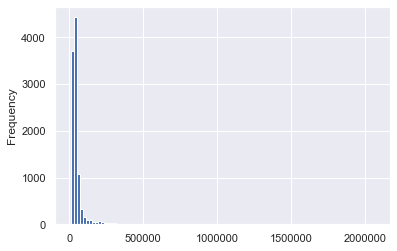

In [64]:
abv7k.MSRP.plot(kind='hist', bins = 100)

In [65]:
abv7k.describe()

,year,hp,num_cyl,doors,highway_mpg,city_mpg,popularity,MSRP
count,10278.000000,10209.000000,10248.000000,10272.000000,10278.000000,10278.000000,10278.000000,1.027800e+04
mean,2012.868068,262.766872,5.643150,3.520639,27.139813,20.131446,1557.799864,4.668452e+04
std,4.496040,109.802046,1.823371,0.839908,8.602507,9.477214,1420.594850,6.259471e+04
min,1993.000000,66.000000,0.000000,2.000000,12.000000,7.000000,2.000000,7.523000e+03
25%,2010.000000,181.000000,4.000000,3.000000,22.000000,16.000000,549.000000,2.489500e+04
50%,2015.000000,250.000000,6.000000,4.000000,26.000000,19.000000,1385.000000,3.259500e+04
75%,2016.000000,310.000000,6.000000,4.000000,31.000000,22.000000,2009.000000,4.499875e+04
max,2017.000000,1001.000000,16.000000,4.000000,111.000000,137.000000,5657.000000,2.065902e+06


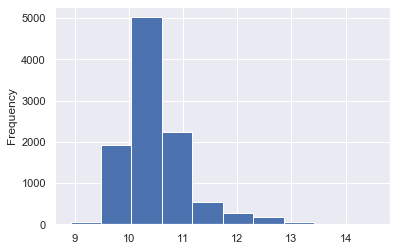

In [66]:
nlog = np.log(abv7k.MSRP)
nlog.plot(kind='hist')

In [67]:
abv7k['cat_1'] = abv7k.cat_1.str.replace('nan', 'standard')

D:\Ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
abv7k.groupby('cat_1').size()

cat_1
crossover           2034
diesel               126
exotic               499
factory tuner        409
flex fuel           1059
hatchback            919
high-performance     199
hybrid               123
luxury              1634
performance          545
standard            2731
dtype: int64

In [69]:
abv7k.to_csv('Cleaneddata.csv')

# Wrap-Up

Now that the data has been cleaned up to the extent that it has, I'm going to be creating visualizations in Tableau public as a way to practice making visualizations in an industry standard program that isn't python.

This will be the end of the data cleaning and EDA part of the project, and the next portion of the project will be the machine learning portion of the project. Please see Milestone Report 1 for the visualizations and an analysis of what those visualizations can say about the data.